## Course Work Project DSM020
#### Student number: 190564408

#### Objective: Between 1960 to 2019 who werethe top performing ice goalkeepers?

1. Introduction 

2. Who were the top performing goalkeepers? 
    1. Data preparation 
    2. Data analysis 
    3. Findings 
    
3. What does it take to be a great ice goalie? 
    1. Data preparation
    2. Data analysis 
    3. Findings 

4. Short comings and recommendations 
5. Conclusion
----

 #### 1. Introduction 

I wanted to determine who the best ice hockey goalkeepers were between 1960 to 2019. I sourced my data publicly from the NHL website (http://www.nhl.com/stats/goalies). 

This ties into the first topics regarding fitness and health and is loosely related given for a sport you need to exert a level of fitness to play the game.

After the data was downloaded, I merged the data files and took time to understand all the variables. I changed the datatypes as needed and cleaned the file.  

Before starting my analysis, I did some data checks, then I ran a few statistical measures that defined top performance. These results were presented graphically. 

After I found out who the top goalkeepers were, I wanted to understand what makes an ice hockey goalkeeper great. For this I used online articles and blogs. 

finishing off the project, I investigated some short falls and recommendations for a more robust project.

#### 2. Who are the top performing goalkeepers? 

##### A. Data preparation

In [1]:
import pandas as pd
import numpy as np
import csv
import os
import glob

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#All data files are stored in the Data folder 
cwd = os. getcwd() + '\\Data'
print(cwd)

C:\Users\user\Documents\dsm020\Data


In [3]:
#List all the data files from the Data folder
path = os.chdir(cwd)
files = os.listdir(cwd)
print(files)

['article.txt', 'Summary1960.xlsx', 'Summary1961.xlsx', 'Summary1962.xlsx', 'Summary1963.xlsx', 'Summary1964.xlsx', 'Summary1965.xlsx', 'Summary1966.xlsx', 'Summary1967.xlsx', 'Summary1968.xlsx', 'Summary1969.xlsx', 'Summary1970.xlsx', 'Summary1971.xlsx', 'Summary1972.xlsx', 'Summary1973.xlsx', 'Summary1974.xlsx', 'Summary1975.xlsx', 'Summary1976.xlsx', 'Summary1977.xlsx', 'Summary1978.xlsx', 'Summary1979.xlsx', 'Summary1980.xlsx', 'Summary1981.xlsx', 'Summary1982.xlsx', 'Summary1983.xlsx', 'Summary1984.xlsx', 'Summary1985.xlsx', 'Summary1986.xlsx', 'Summary1987.xlsx', 'Summary1988.xlsx', 'Summary1989.xlsx', 'Summary1990.xlsx', 'Summary1991.xlsx', 'Summary1992.xlsx', 'Summary1993.xlsx', 'Summary1994.xlsx', 'Summary1995.xlsx', 'Summary1996.xlsx', 'Summary1997.xlsx', 'Summary1998.xlsx', 'Summary1999.xlsx', 'Summary2000.xlsx', 'Summary2001.xlsx', 'Summary2002.xlsx', 'Summary2003.xlsx', 'Summary2005.xlsx', 'Summary2006.xlsx', 'Summary2007.xlsx', 'Summary2008.xlsx', 'Summary2009.xlsx', 'Sum

In [4]:
excefiles = [i for i in glob.glob('*.{}'.format('xlsx'))]

In [5]:
#Merge the data files 
goalie = pd.DataFrame() 

for i in excefiles: 
    info = pd.read_excel(i,'Summary') #Summary is the common name on all sheets
    goalie = goalie.append(info) 
print(goalie)

              Player    Season Team S/C  GP  GS   W   L   T  OT  ...    Svs  \
0       Johnny Bower  19601961  TOR   L  58  58  33  15  10  --  ...  1,725   
1         Glenn Hall  19601961  CHI   L  70  70  29  24  17  --  ...  2,026   
2     Jacques Plante  19601961  MTL   L  40  40  23  11   6  --  ...  1,056   
3       Gump Worsley  19601961  NYR   L  59  59  20  29   8  --  ...  1,990   
4      Charlie Hodge  19601961  MTL   L  30  30  18   8   4  --  ...    802   
..               ...       ...  ...  ..  ..  ..  ..  ..  ..  ..  ...    ...   
82     Garret Sparks  20192020  VGK   L   1   0   0   0  --   0  ...     12   
83  Michael Dipietro  20192020  VAN   L   1   0   0   0  --   0  ...      6   
84  Kasimir Kaskisuo  20192020  TOR   L   1   1   0   1  --   0  ...     32   
85       Oscar Dansk  20192020  VGK   L   1   1   0   1  --   0  ...     31   
86    Calvin Pickard  20192020  DET   L   3   1   0   2  --   0  ...     59   

     GA    Sv%   GAA       TOI SO  G  A  P  PIM  
0

In [6]:
#Data cleaning for each excel file the index reset to 1, the reset drop true allows consecutive numbering 
goalie1 = goalie.copy().reset_index(drop=True)

In [7]:
#I identified the variables that needed to be string, integar or float and corrected this 
goalie1.info()
goalie1.describe()
goalie1.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 21 columns):
Player    3803 non-null object
Season    3803 non-null int64
Team      3803 non-null object
S/C       3803 non-null object
GP        3803 non-null int64
GS        3803 non-null int64
W         3803 non-null int64
L         3803 non-null int64
T         3803 non-null object
OT        3803 non-null object
SA        3803 non-null object
Svs       3803 non-null object
GA        3803 non-null int64
Sv%       3803 non-null object
GAA       3803 non-null float64
TOI       3803 non-null object
SO        3803 non-null int64
G         3803 non-null int64
A         3803 non-null int64
P         3803 non-null int64
PIM       3803 non-null int64
dtypes: float64(1), int64(11), object(9)
memory usage: 624.1+ KB


,Player,Season,Team,S/C,GP,GS,W,L,T,OT,...,Svs,GA,Sv%,GAA,TOI,SO,G,A,P,PIM
0,Johnny Bower,19601961,TOR,L,58,58,33,15,10,--,...,"1,725",145,0.922,2.50,"3,480:00",2,0,0,0,0
1,Glenn Hall,19601961,CHI,L,70,70,29,24,17,--,...,"2,026",177,0.92,2.53,"4,194:00",6,0,1,1,0
2,Jacques Plante,19601961,MTL,L,40,40,23,11,6,--,...,"1,056",112,0.904,2.80,"2,400:00",2,0,0,0,2
3,Gump Worsley,19601961,NYR,L,59,59,20,29,8,--,...,"1,990",190,0.913,3.29,"3,468:51",1,0,0,0,10
4,Charlie Hodge,19601961,MTL,L,30,30,18,8,4,--,...,802,74,0.916,2.47,"1,798:00",4,0,0,0,0
5,Hank Bassen,19601961,DET,L,35,34,14,12,8,--,...,844,100,0.894,2.93,"2,046:00",0,0,1,1,6
6,Bruce Gamble,19601961,BOS,L,52,52,12,33,7,--,...,"1,588",193,0.892,3.71,"3,118:00",0,0,0,0,14
7,Terry Sawchuk,19601961,DET,L,37,36,11,17,8,--,...,975,112,0.897,3.13,"2,148:00",2,0,1,1,8
8,Cesare Maniago,19601961,TOR,L,7,7,4,2,1,--,...,219,17,0.928,2.43,418:58,0,0,0,0,2
9,Don Simmons,19601961,BOS,R,18,18,3,9,6,--,...,535,58,0.902,3.23,"1,077:27",1,0,0,0,6


When I tried to change the data type I came across as few problems that needed to be fixed:   

In [8]:
#1. For Sv%, T and OT there were '--' in the columns, I converted this to numeric, all non-numerics became NAN
goalie1[['Sv%','T','OT']] = goalie1[['Sv%','T','OT']].apply(pd.to_numeric,errors='coerce')
goalie1['Sv%'] = goalie1['Sv%']*100

In [9]:
#2. SA and Svs had a comma that needed to be removed and needed to be changed to int 
cols = ['Svs', 'SA']
goalie1[cols] = goalie1[cols].replace({',': ''}, regex=True)

In [10]:
goalie1[['SA','Svs']] = goalie1[['SA','Svs']].astype(int)

In [11]:
#3. I pulled out only the first year from the column
goalie1['Season'] = goalie1['Season'].astype(str).str[:4]
goalie1['Season'] = goalie1['Season'].astype(int)

In [12]:
#4. TOI needed to become datetime 
goalie1['TOI'] = goalie1['TOI'].str.replace(',', '')

In [13]:
time = goalie1['TOI'].str.split(':', n = 1, expand = True) 
goalie1['min'] = time[0] 
goalie1['secs'] = time[1] 

In [14]:
goalie1[['min','secs']] = goalie1[['min','secs']].astype(int)
goalie1['TOI_new'] = ((60 * goalie1['min']) + goalie1['secs']) / 60

In [15]:
#5. Some players play for more than one team, I chose to only look at the first team mentioned 
club = goalie1['Team'].str.split(',', n = 1, expand = True) 
goalie1['t1'] = club[0] 
goalie1['t2'] = club[1] 

In [16]:
#6. In S/C there was '--' that needed to be removed, this is to stay as a string 
goalie1['S/C'] = goalie1['S/C'].str.replace('--','')

When it came to missing data, I found that Sv% had 10 rows where players have 0 shots against them, I removed these rows. 

OT(Overtime) and T(ties) are dependent on each other, if there is OT then there will be no T similarly the other way too. 

In [17]:
#7. Missing data
drop_row = goalie1[goalie1['SA'] == 0].index
goalie1.drop(drop_row , inplace=True)

8. I decided to the leave the outliers in my data, because if there is a goalie is who out performing the rest, this is something I would want to investigate. Considering the aim of this project is to identify the top performers, any goalie who is not part of the top 100 will only feature in the exploratory analysis and not part of the results. 

In [18]:
#droped all redundant columns
goalie1 = goalie1.drop(columns = ['TOI','min','secs','t2','Team','OT','T'])

In [19]:
#I renamed all columns, explanation of each feature was found: https://en.wikipedia.org/wiki/Ice_hockey_statistics

new_cols = {
    't1':'team',                      #First listed team 
    'S/C':'catches',                  #Goalie catches Left or Right 
    'GP':'games_played',              #Games the goaltender played
    'GS':'games_started',             #Games the goaltender started
    'W':'wins',                       #Games won
    'L':'losses',                     #Games lost
    'SA':'shots_against',             #Shots against that player's team while player is on the ice
    'Svs':'saves',                    #Saved shots on goal
    'GA':'goals_against',             #Goals scored against the goaltender
    'Sv%':'save_per',                 #Percentage of saves
    'GAA':'goals_against_average',    #Mean goals-per-60 minutes scored on the goaltender
    'TOI_new':'time(on ice)',         #Total time (mins) a player is on the ice during the playing of the game
    'SO':'shutouts',                  #Number of games where the goaltender had no goals against him and was the only goaltender to play
    'G':'goals ',                     #Goals each player scored
    'A':'assists',                    #Goals the player assisted in
    'P':'points',                     #Sum of goals and assists
    'PIM':'penalties(min)'            #Number of penalty minutes
    }

goalie1 = goalie1.rename(index=str, columns=new_cols)
goalie1.columns = map(str.lower, goalie1.columns)

In [20]:
#I doubled checked that points listed from 1-8 took effect
goalie1.head(10)

,player,season,catches,games_played,games_started,wins,losses,shots_against,saves,goals_against,save_per,goals_against_average,shutouts,goals,assists,points,penalties(min),time(on ice),team
0,Johnny Bower,1960,L,58,58,33,15,1870,1725,145,92.2,2.50,2,0,0,0,0,3480.000000,TOR
1,Glenn Hall,1960,L,70,70,29,24,2203,2026,177,92.0,2.53,6,0,1,1,0,4194.000000,CHI
2,Jacques Plante,1960,L,40,40,23,11,1168,1056,112,90.4,2.80,2,0,0,0,2,2400.000000,MTL
3,Gump Worsley,1960,L,59,59,20,29,2180,1990,190,91.3,3.29,1,0,0,0,10,3468.850000,NYR
4,Charlie Hodge,1960,L,30,30,18,8,876,802,74,91.6,2.47,4,0,0,0,0,1798.000000,MTL
5,Hank Bassen,1960,L,35,34,14,12,944,844,100,89.4,2.93,0,0,1,1,6,2046.000000,DET
6,Bruce Gamble,1960,L,52,52,12,33,1781,1588,193,89.2,3.71,0,0,0,0,14,3118.000000,BOS
7,Terry Sawchuk,1960,L,37,36,11,17,1087,975,112,89.7,3.13,2,0,1,1,8,2148.000000,DET
8,Cesare Maniago,1960,L,7,7,4,2,236,219,17,92.8,2.43,0,0,0,0,2,418.966667,TOR
9,Don Simmons,1960,R,18,18,3,9,593,535,58,90.2,3.23,1,0,0,0,6,1077.450000,BOS


In [21]:
#I doubled checked I got the data types right and that the missing data rows were deleted, as well as the redundant colunms
goalie1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3793 entries, 0 to 3802
Data columns (total 19 columns):
player                   3793 non-null object
season                   3793 non-null int32
catches                  3793 non-null object
games_played             3793 non-null int64
games_started            3793 non-null int64
wins                     3793 non-null int64
losses                   3793 non-null int64
shots_against            3793 non-null int32
saves                    3793 non-null int32
goals_against            3793 non-null int64
save_per                 3793 non-null float64
goals_against_average    3793 non-null float64
shutouts                 3793 non-null int64
goals                    3793 non-null int64
assists                  3793 non-null int64
points                   3793 non-null int64
penalties(min)           3793 non-null int64
time(on ice)             3793 non-null float64
team                     3793 non-null object
dtypes: float64(3), int32(3), int6

Initially when I did my data spot checks I found a few years to be missing I then found out I duplicated 2000 data file and it had the wrong label. I picked this up by looking at my numbers if there was a number that didn't fit the trend I knew there was a problem. This was fixed by labelling the files right and now I see all the numbers are 'smooth'. i.e 1968 was sitting at a count of 70. Here I knew i did something wrong. 

In [22]:
season = goalie1.season.value_counts().sort_index()
season

1960    14
1961    14
1962    15
1963    15
1964    12
1965    19
1966    19
1967    31
1968    38
1969    34
1970    41
1971    41
1972    45
1973    49
1974    51
1975    53
1976    53
1977    53
1978    50
1979    69
1980    70
1981    66
1982    67
1983    69
1984    66
1985    50
1986    63
1987    63
1988    50
1989    70
1990    77
1991    50
1992    71
1993    79
1994    68
1995    78
1996    76
1997    73
1998    85
1999    83
2000    88
2001    89
2002    91
2003    94
2005    89
2006    84
2007    89
2008    89
2009    83
2010    87
2011    88
2012    82
2013    97
2014    92
2015    92
2016    94
2017    95
2018    93
2019    87
Name: season, dtype: int64

##### B. Data analysis

In [23]:
goalie1.head()

,player,season,catches,games_played,games_started,wins,losses,shots_against,saves,goals_against,save_per,goals_against_average,shutouts,goals,assists,points,penalties(min),time(on ice),team
0,Johnny Bower,1960,L,58,58,33,15,1870,1725,145,92.2,2.50,2,0,0,0,0,3480.00,TOR
1,Glenn Hall,1960,L,70,70,29,24,2203,2026,177,92.0,2.53,6,0,1,1,0,4194.00,CHI
2,Jacques Plante,1960,L,40,40,23,11,1168,1056,112,90.4,2.80,2,0,0,0,2,2400.00,MTL
3,Gump Worsley,1960,L,59,59,20,29,2180,1990,190,91.3,3.29,1,0,0,0,10,3468.85,NYR
4,Charlie Hodge,1960,L,30,30,18,8,876,802,74,91.6,2.47,4,0,0,0,0,1798.00,MTL


In [24]:
goalie1.describe()

,season,games_played,games_started,wins,losses,shots_against,saves,goals_against,save_per,goals_against_average,shutouts,goals,assists,points,penalties(min),time(on ice)
count,3793.000000,3793.00000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000
mean,1995.517005,28.79014,26.653572,12.126549,10.999209,796.909043,716.957553,79.951490,89.100791,3.282259,1.432639,0.003427,0.701028,0.704456,4.346691,1608.782749
std,15.480909,21.05515,21.010915,11.030085,8.602708,612.965228,556.236824,59.607106,4.423958,3.219832,1.976059,0.058451,1.127776,1.132528,7.965993,1233.456481
min,1960.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.650000
25%,1983.000000,9.00000,7.000000,2.000000,3.000000,224.000000,198.000000,25.000000,87.800000,2.550000,0.000000,0.000000,0.000000,0.000000,0.000000,453.800000
50%,1997.000000,27.00000,24.000000,9.000000,10.000000,718.000000,645.000000,74.000000,89.800000,3.020000,1.000000,0.000000,0.000000,0.000000,2.000000,1456.233333
75%,2009.000000,45.00000,43.000000,20.000000,17.000000,1260.000000,1135.000000,128.000000,91.200000,3.680000,2.000000,0.000000,1.000000,1.000000,4.000000,2565.933333
max,2019.000000,79.00000,78.000000,48.000000,48.000000,2523.000000,2306.000000,282.000000,100.000000,184.620000,15.000000,1.000000,14.000000,14.000000,113.000000,4696.550000


Text(0.5, 1, 'Correlation Matrix')

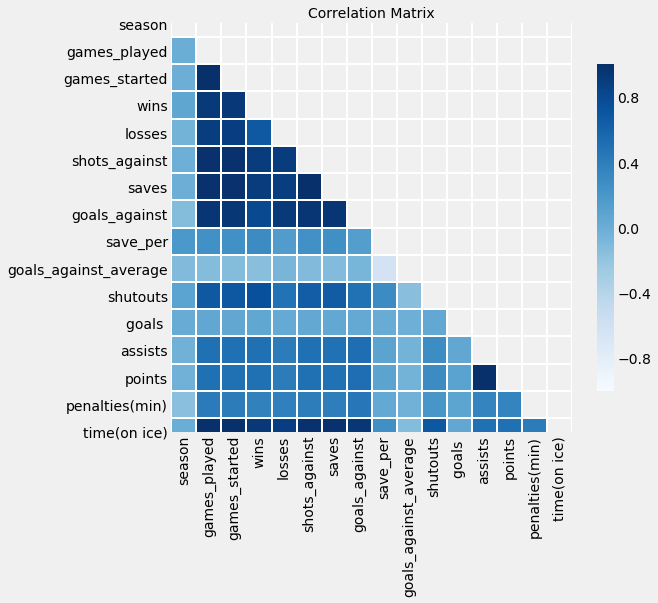

In [25]:
plt.style.use('fivethirtyeight')
corr = goalie1.corr()

# Generate a mask for the upper triangle, True = do not show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(8,7))
sns.heatmap(corr,mask=mask, cmap='Blues', linewidths=1.0, vmin=1.0, vmax=-1.0,cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14)

#where I got the code from to help with masking the upper corner
#https://lost-stats.github.io/Presentation/heatmap_colored_correlation_matrix.html

There is a strong correlation between the games played feature to games started to number of save, shots against, wins, games started and losses. 

Logic serves that a coach wouldn’t want a goalie start or have them stay on the ice if the losses, shots against were outweighed by the wins and saves (respectively).

This already provides guidance that we are looking or goalies who have a high number of games played, who are likely to start a game, have a high save % regardless of the shots against, the goalie can have a high number of shots against then but it’s the save% that would matter. Goals against will also be taken into consideration. 

Text(0.5, 1.0, 'Total games played since 1960')

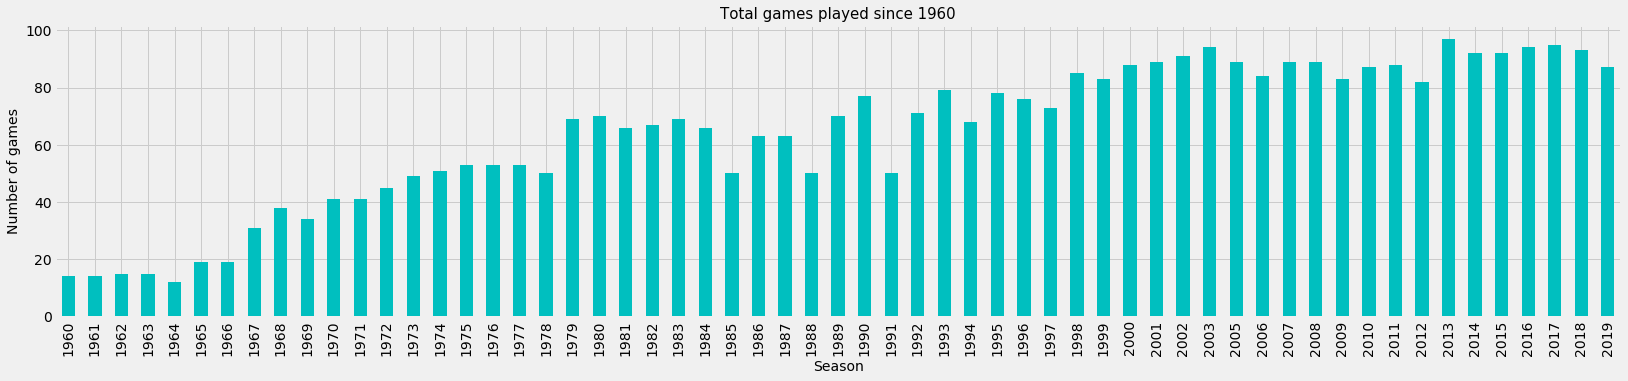

In [26]:
plt.figure(figsize=(25,5))
goalie1.groupby('season').games_played.count().plot(kind='bar', color='c')

plt.ylabel('Number of games', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.title('Total games played since 1960', fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

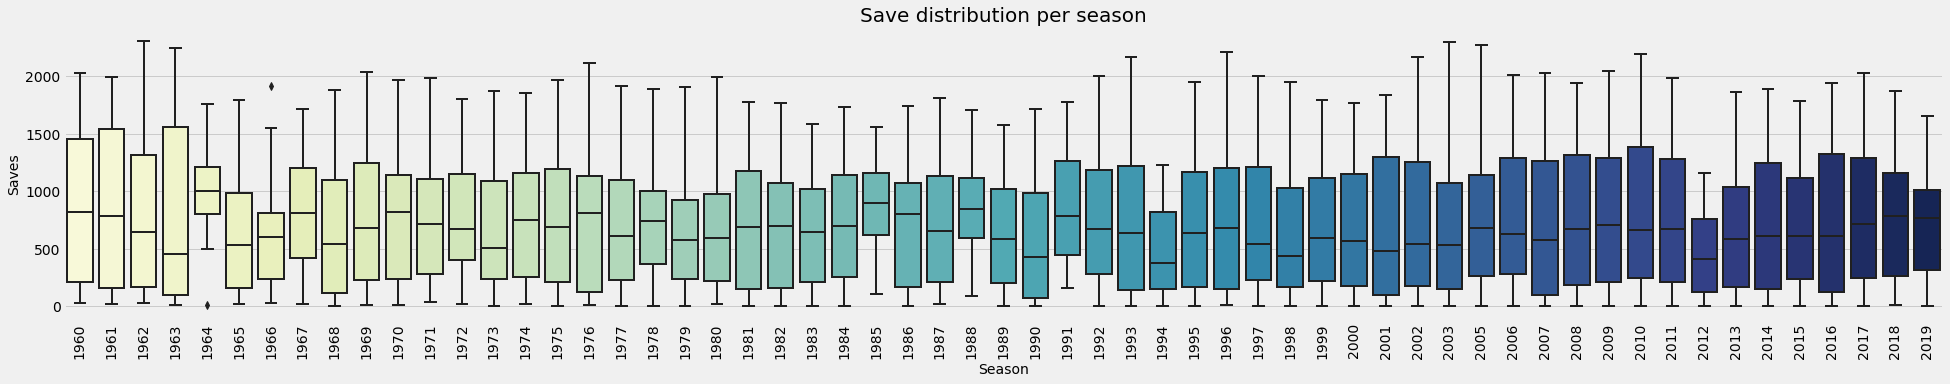

In [27]:
plt.figure(figsize=(30,5))
sns.boxplot(x='season', y='saves', data=goalie1, palette='YlGnBu', linewidth=2)

plt.ylabel('Saves', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.title('Save distribution per season', fontsize=20)

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

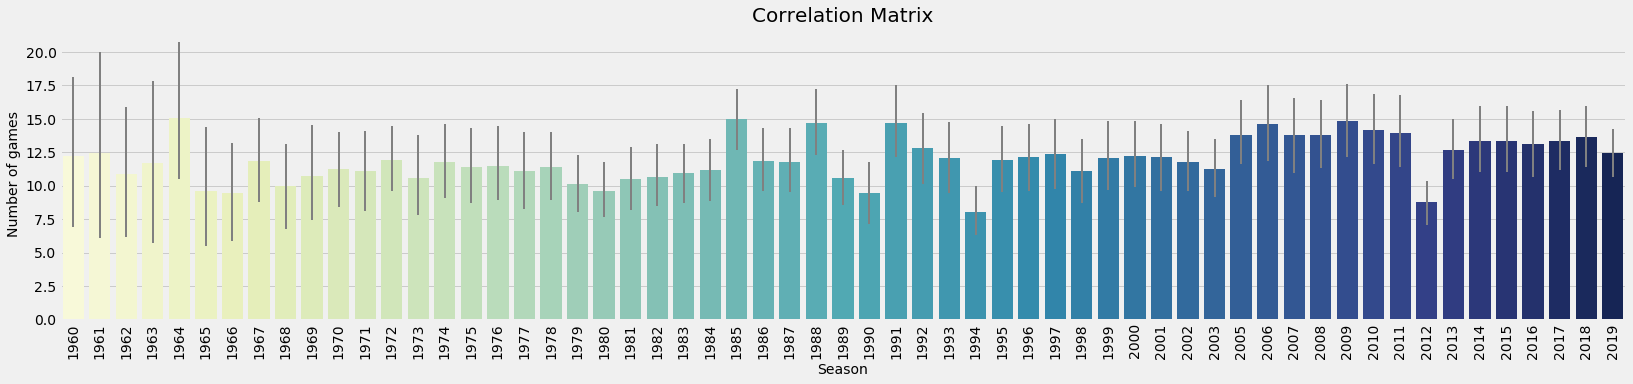

In [28]:
plt.figure(figsize=(25,5))
sns.barplot(x='season', y='wins', data=goalie1, palette='YlGnBu', errcolor='gray', errwidth=2)

plt.ylabel('Number of games', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.title('Correlation Matrix', fontsize=20)

plt.xticks(rotation=90)

In [29]:
#player Stats 
player_pivot =  pd.pivot_table(data=goalie1, index='player', values=['games_played','games_started','wins','goals_against','save_per','season','points'],
              aggfunc={'games_played':'sum','games_started':'sum','wins':'sum','goals_against':'sum','save_per':'mean','season':'min','points':'mean'}).reset_index().rename(columns={'games_played': 'total games played', 'games_started': 'total games started','wins':'total wins','goals_against':'total goals against','save%':'average save percent','season':'season start','points':'average number points scored'})

In [30]:
top30 = player_pivot.reset_index().sort_values(['total goals against'], ascending=[False]).set_index(['player']).nlargest(30,['total goals against'])
top30

,index,total games played,total games started,total goals against,average number points scored,save_per,season start,total wins
player,,,,,,,,
Martin Brodeur,422,1262,1249,2771,2.238095,91.085714,1993,689
Grant Fuhr,244,868,829,2756,2.473684,88.442105,1981,403
Gilles Meloche,234,788,757,2755,1.222222,88.566667,1970,270
Tony Esposito,642,886,874,2563,1.562500,90.525000,1968,423
Patrick Roy,510,1029,1003,2546,2.368421,91.368421,1984,551
Curtis Joseph,125,943,916,2516,1.631579,90.300000,1989,454
Roberto Luongo,565,1044,1014,2515,1.210526,91.742105,1999,489
John Vanbiesbrouck,337,882,841,2502,1.750000,90.195000,1981,374
Tom Barrasso,635,777,755,2385,2.526316,88.900000,1983,369


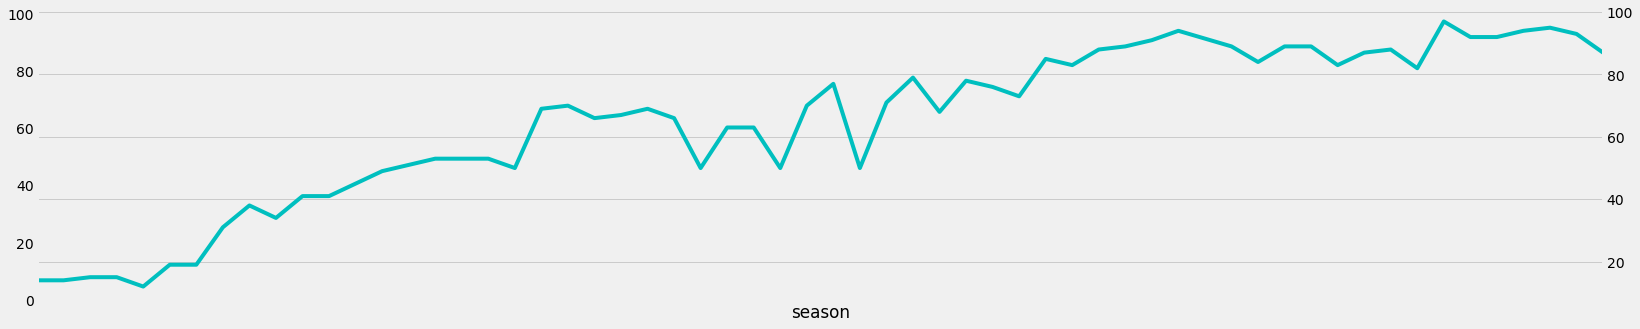

In [31]:
plt.figure(figsize=(25,5))
goalie1.groupby('season').games_played.count().plot(kind='bar', color='c')
goalie1.groupby('season').save_per.count().plot(kind='line', color='c', secondary_y=True)

# plt.ylabel('Number of games', fontsize=14)
# plt.xlabel('Season', fontsize=14)
# plt.title('Total games played since 1960', fontsize=15)

[]

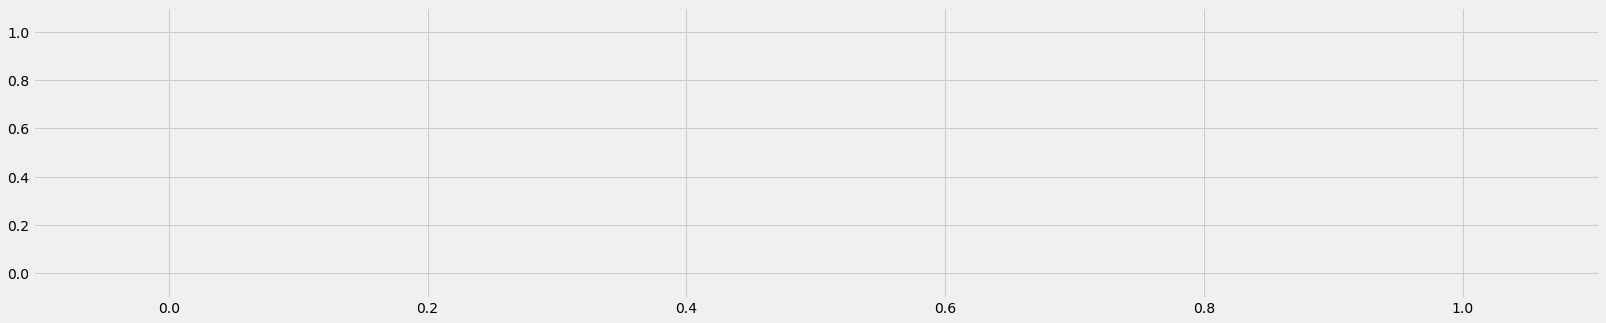

In [32]:
plt.figure(figsize=(25,5))
plt.plot(kind='bar', color='c')
plt.plot(kind='line', color='y', secondary_y=True)

Text(0.5, 1.0, 'Goals against vs save%')

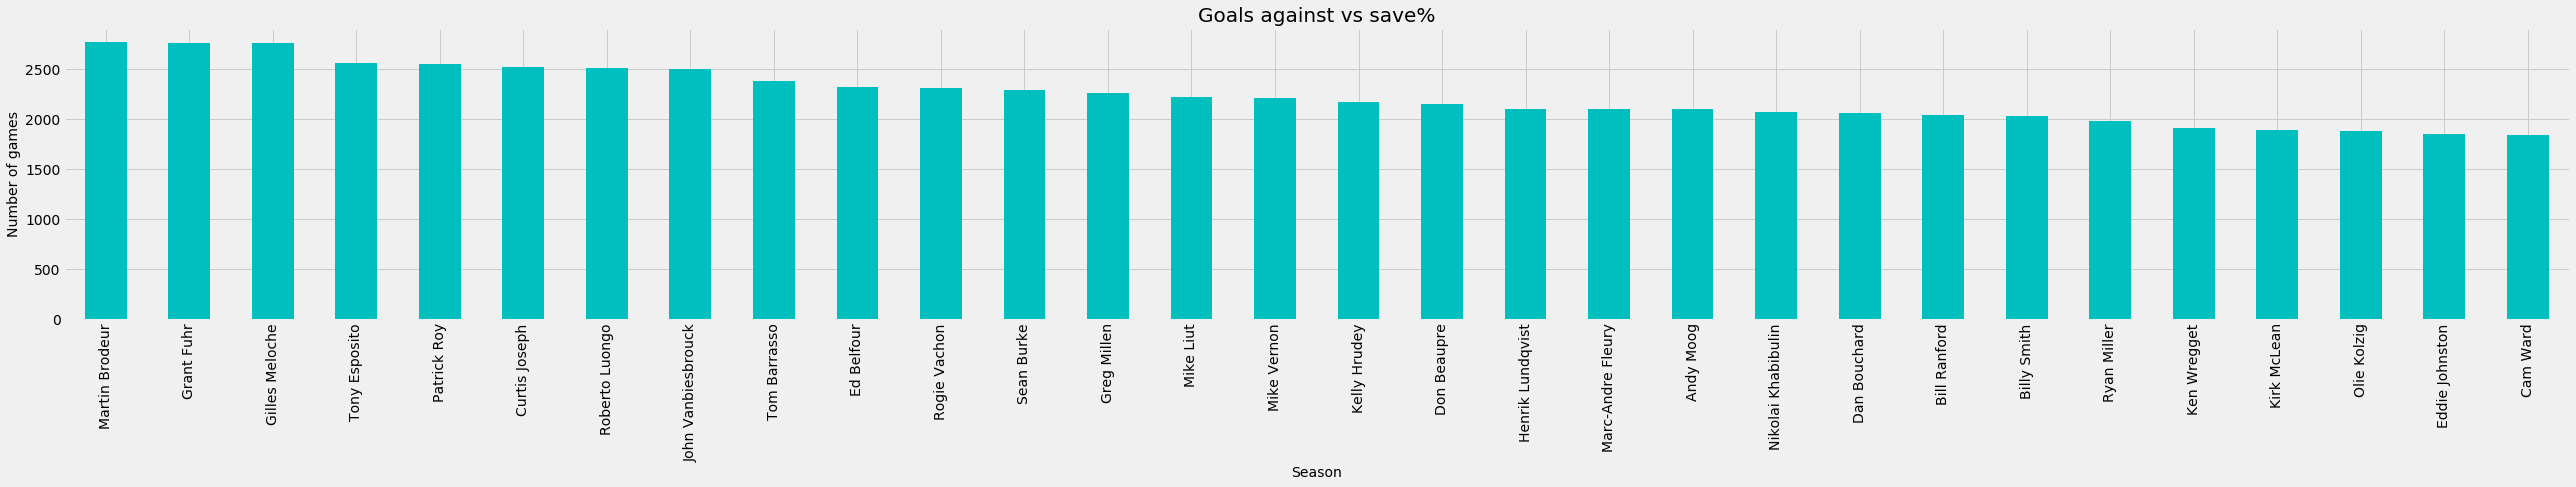

In [33]:
plt.figure(figsize=(40,5))


top30['total goals against'].plot(kind='bar',color = 'c')
#top30['average save percent'].plot(secondary_y=True, color='y')

plt.ylabel('Number of games', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.title('Goals against vs save%', fontsize=20)


##### C. Findings 

This is what I found in the data and this is what it speaks to - what are my findings and what makes this soooo wow

#### 3. What does it take to be a great ice goalie? 

##### A. Data preparation


In [ ]:
import requests
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 

import re
import string

I scrapped the website to collect articles. 

art1 = requests.get('http://thegoalieguru.blogspot.com/2017/08/the-many-characteristics-needed-to-be.html')
<br />art2 = requests.get('https://bleacherreport.com/articles/1734932-blueprint-for-the-perfect-nhl-goaltender')

Article 1
<br />soup1 = BeautifulSoup(art1.content,'html.parser')
<br />art1 = soup1.find(class_ ='post-body entry-content').text
<br />print(art1)

Article 2
<br />soup2 = BeautifulSoup(art2.content,'html.parser')
<br />art2 = soup2.find(class_ ='organism contentStream').text
<br />print(art2)

file = open('article.txt', 'w') 
<br />file.write(art1) 
<br />file.close() 

file = open('article.txt', 'a') 
<br />file.write(art2) 
<br />file.close() 

In [ ]:
f = open('article.txt', 'r')
data = f.read()

After reading the data files, these articles would also need to be cleaned

In [ ]:
#1. Make lower case and strip all trailing spaces
data = ' '.join([line.strip() for line in data.strip().splitlines() if line.strip()]).lower()

In [ ]:
#2. Remove punctuation 
table = str.maketrans(dict.fromkeys(string.punctuation))  
data = data.translate(table)
#data #checking that the data is in the right format 

In [ ]:
#3. Remove en and em dashes 
data = data.replace('\u2013', '')#en dash
data = data.replace('\u2014', '')#em dash
#data #checking that the dashes are gone 

In [ ]:
#4. Remove stop words 
word_tokens = word_tokenize(data) 
  
filterData = [w for w in word_tokens if not w in stop_words] 
filterData = [] 
for w in word_tokens: 
    if w not in stop_words: 
        filterData.append(w) 

In [ ]:
#5. Remove any other redundant words
goal_wrds = ['goalie', 'goalies','goaltenders','goaltender','goal','good',
             'take','many','often','youve','thats','one','puck','goals','make','takes']

for word in list(filterData):
    if word in goal_wrds:
        filterData.remove(word)

In [ ]:
#Convert list to a string so that this can pass through the word cloud
datastr = ' '.join([str(elem) for elem in filterData]) 

##### B. Data analysis 


In [ ]:
from wordcloud import WordCloud

In [ ]:
# word cloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(datastr)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('What makes a goalie great?')
plt.show()

##### C. Findings 

Based on the above word cloud it's evident that in order to be a great goalie, these two articles mention 'kid', 'team', 'time' and a small mention towards parent. These words allude to parents playing a role, playing as part of a team as well as being in the right position.   


#### 4. Short comings and recommendations 


Nearly not enough articles were looked at, it would be recommended to look at a minimum of 30 articles or blogs in order to get a clearer understanding of the sentiment around which descriptors are used to define: what does it take to be a great ice hockey goalie. 

Additionally, looking into stemming and lemmatization to help narrow down words to their root, this would then avoid the unnecessary words appearing in the word cloud.

#### 5. Conclusion